<a href="https://colab.research.google.com/github/brennoliveira/ML-Bolsa-Familia/blob/main/An%C3%A1lise_Bolsa_Fam%C3%ADlia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns

In [174]:
df = pd.read_csv('datasets/data_familia_sergipe.csv')
dp = pd.read_csv('datasets/data_pessoas_sergipe.csv')

In [175]:
df.head()
# 1. NORMALIZAR OS DADOS
# 2. REDUZIR VARIÁVEIS
# 

# df.corr()

# A PARTIR DA CORRELAÇÃO, IDENTIFICAMENTO UMA CORRELAÇÃO NEGATIVA FORTE ENTRE marc_pbf e vlr_renda_media_fam

# dp.corr()

# A PARTIR DA CORRELAÇÃO, IDENTIFICAMENTO UMA CORRELAÇÃO POSITIVA FORTE ENTRE idade e cod_curso_frequenta_memb


,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [176]:
# PORCENTAGEM DE PESSOAS QUE RECEBEM BOLSA FAMILIA
df_recebem = df.query('marc_pbf == 1')
df_recebem

df.marc_pbf.value_counts(normalize=True)*100

1    61.460954
0    38.539046
Name: marc_pbf, dtype: float64

In [177]:
# QUEM RECEBE BF COMPARADO COM A RENDA MEDIA
frequencia = pd.crosstab(df.marc_pbf, df.vlr_renda_media_fam)
frequencia

vlr_renda_media_fam,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2515.0,2542.0,2600.0,2638.0,2700.0,2701.0,2739.0,2791.0,2800.0,2811.0
marc_pbf,,,,,,,,,,,,,,,,,,,,,
0,338,1,12,7,22,27,35,18,47,2,...,1,1,1,1,2,1,1,1,2,2
1,2757,102,293,237,456,465,567,191,840,119,...,0,0,0,0,0,0,0,0,0,0


In [178]:
# MÉDIA DA RENDA MÉDIA ENTRE AS PESSOAS QUE RECEBEM E N RECEBEM BOLSA FAMILIA
df.groupby(['marc_pbf'])['vlr_renda_media_fam'].mean()



marc_pbf
0    478.413082
1     55.436134
Name: vlr_renda_media_fam, dtype: float64

In [179]:
df_recebem.mode()

# MAIS FAMILIAS DA REGIÁO OUTRAS RECEBEM 
# MAIS FAMILIAS DA ZONA URBANA
# MAIS FAMILIAS COM 2 PESSOAS

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2800308.0,2.0,3.0,183417.0,2003-03-13,2018-09-30,50.0,2018-09-11,1.0,1.0,...,2.0,2.0,CENTRO DE SAUDE JOSE NAILSON MOURA,3010732.0,CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL CRAS,2.804500e+10,0.0,1.0,2.0,5.502451e+14
1,NaN,NaN,NaN,183419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,183420.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,183421.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,183422.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50562,NaN,NaN,NaN,4250240.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50563,NaN,NaN,NaN,4250241.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50564,NaN,NaN,NaN,4250243.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50565,NaN,NaN,NaN,4250244.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df_recebem.vlr_renda_media_fam.quantile([i / 10 for i in range(1,10)])

0.1     7.0
0.2    17.0
0.3    27.0
0.4    40.0
0.5    50.0
0.6    60.0
0.7    70.0
0.8    80.0
0.9    96.4
Name: vlr_renda_media_fam, dtype: float64

<AxesSubplot:title={'center':'Renda média'}, xlabel='vlr_renda_media_fam', ylabel='marc_pbf'>

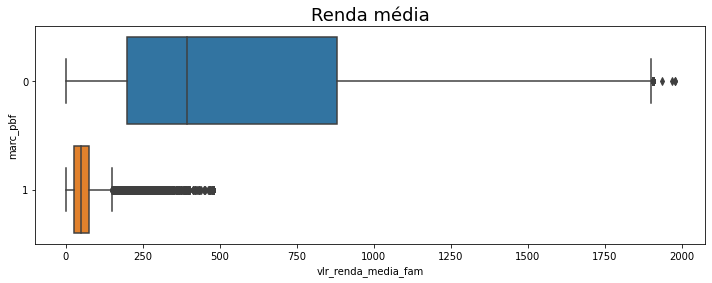

In [181]:
ax = sns.boxplot(x = 'vlr_renda_media_fam', y = 'marc_pbf', data = df.query('vlr_renda_media_fam < 2000'), orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda média', fontsize=18)
ax

<AxesSubplot:>

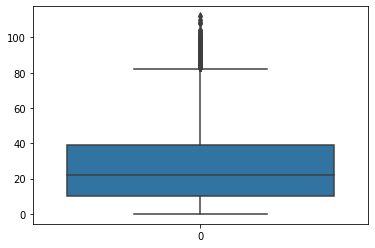

In [182]:
# idade
sns.boxplot(data=dp['idade'])


<AxesSubplot:>

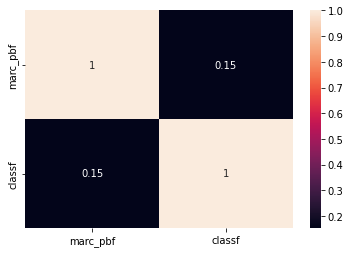

In [213]:
df['vlr_renda_media_fam'] = pd.cut(df['vlr_renda_media_fam'],bins=[0, 200, float('inf')],right=False,labels=[''])




In [183]:
# transformação de dados

# raça/cor das pessoas cadastradas
dp['cod_raca_cor_pessoa'] = pd.cut(dp['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,5.0,float('inf')],right=False,labels=['Branca','Preta','Amarela','Parda','Indígena'])

# diferença da quantidade de HOMENS e MULHERES
dp['cod_sexo_pessoa'] = pd.cut(dp['cod_sexo_pessoa'],bins=[1.0,2.0,float('inf')],right=False,labels=['Masculino','Feminino'])

# remda média
df['vlr_renda_media_fam'] = pd.cut(df['vlr_renda_media_fam'], bins=[0, 100.0, 500.0, float('inf')], right=False, labels=['Extrema Pobreza', 'Pobreza', 'Leve Pobreza'])

# idade
dp['idade'] = pd.cut(dp['idade'], bins=[0, 13, 24, 60, float('inf')], right=False, labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'])



<AxesSubplot:>

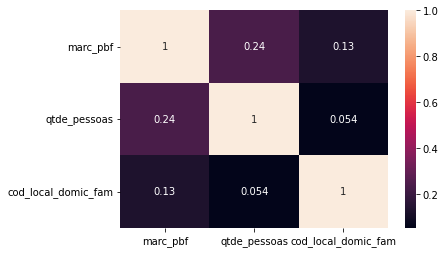

In [218]:
correlation = df[['marc_pbf', 'qtde_pessoas', 'vlr_renda_media_fam', 'cod_local_domic_fam']].corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<AxesSubplot:>

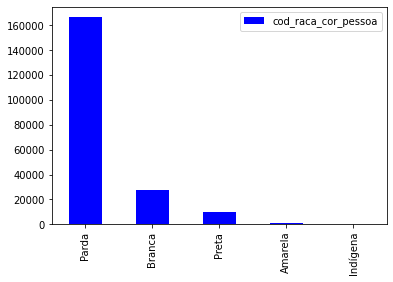

In [184]:

cor = dp['cod_raca_cor_pessoa'].value_counts().to_frame()
cor.plot(kind='bar',color='blue')

<AxesSubplot:>

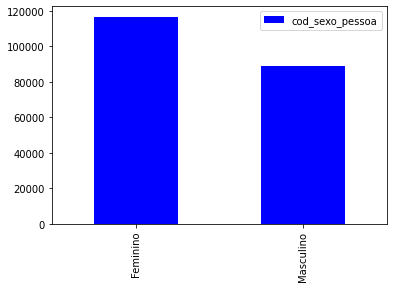

In [185]:

sexo = dp['cod_sexo_pessoa'].value_counts().to_frame()
sexo.plot(kind='bar',color='blue')

In [186]:
# renda média das famílias
df['vlr_renda_media_fam'].sort_values()

0        Extrema Pobreza
44798    Extrema Pobreza
44799    Extrema Pobreza
44800    Extrema Pobreza
44802    Extrema Pobreza
              ...       
11153       Leve Pobreza
58676       Leve Pobreza
58675       Leve Pobreza
11139       Leve Pobreza
56232       Leve Pobreza
Name: vlr_renda_media_fam, Length: 82275, dtype: category
Categories (3, object): ['Extrema Pobreza' < 'Pobreza' < 'Leve Pobreza']

<AxesSubplot:>

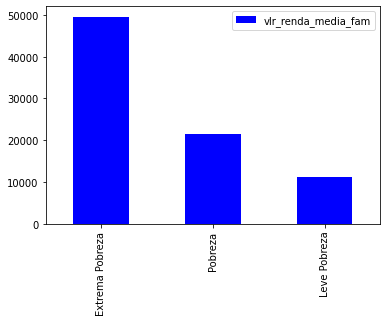

In [187]:

renda = df['vlr_renda_media_fam'].value_counts().to_frame()
renda.plot(kind='bar', color='blue')

<AxesSubplot:>

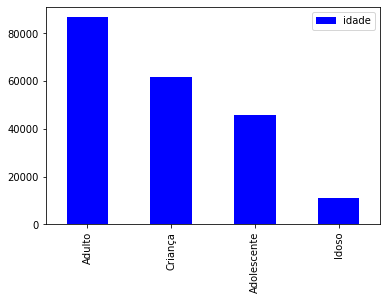

In [188]:

idade = dp['idade'].value_counts().to_frame()
idade.plot(kind='bar', color='blue')

<AxesSubplot:>

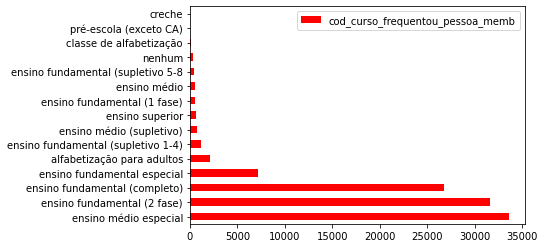

In [189]:
# nível de educação
dp['cod_curso_frequentou_pessoa_memb'] = pd.cut(dp['cod_curso_frequentou_pessoa_memb'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, float('inf')], right=False, labels=['creche', 'pré-escola (exceto CA)', 'classe de alfabetização', 'ensino fundamental (1 fase)', 'ensino fundamental (2 fase)', 'ensino fundamental (completo)', 'ensino fundamental especial', 'ensino médio', 'ensino médio especial', 'ensino fundamental (supletivo 1-4)', 'ensino fundamental (supletivo 5-8', 'ensino médio (supletivo)', 'ensino superior', 'alfabetização para adultos', 'nenhum'])

freq = dp['cod_curso_frequentou_pessoa_memb'].value_counts().to_frame()
freq.plot(kind='barh', color='red')

<AxesSubplot:>

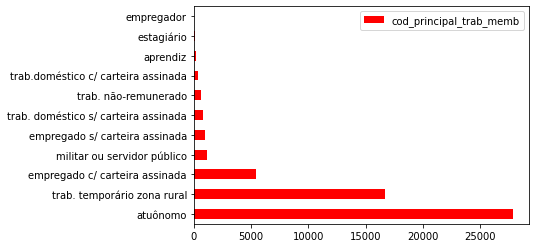

In [190]:
# tipo de trabalho
dp['cod_principal_trab_memb'] = pd.cut(dp['cod_principal_trab_memb'], bins=[1,2,3,4,5,6,7,8,9,10,11, float('inf')], right=False, labels=['atuônomo', 'trab. temporário zona rural', 'empregado s/ carteira assinada', 'empregado c/ carteira assinada', 'trab. doméstico s/ carteira assinada', 'trab.doméstico c/ carteira assinada', 'trab. não-remunerado', 'militar ou servidor público', 'empregador', 'estagiário', 'aprendiz'])

trab = dp['cod_principal_trab_memb'].value_counts().to_frame()
trab.plot(kind='barh', color='red')

In [206]:
# remuneração
# dp['val_remuner_emprego_memb'].max()


ValueError: zero-size array to reduction operation fmin which has no identity